In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sataut = gpd.read_file("./data/satskred/SHP_merge/AvalDet_aut_merge.shp")
sataut["t_0"] = pd.to_datetime(sataut["t_0"])
sataut["t_1"] = pd.to_datetime(sataut["t_1"])

wys = gpd.read_file("data/wyssen/SHP_columns/wys.shp")
wys["d"] = pd.to_datetime(wys["avalancher"])

In [3]:
print(wys["geometry"])
print(wys.crs)
#wys.to_crs('epsg:32633')

0      POLYGON ((8.22970 61.21829, 8.23019 61.21815, ...
1      POLYGON ((8.19351 61.25987, 8.19351 61.25993, ...
2      POLYGON ((8.19963 61.24853, 8.19961 61.24856, ...
3      POLYGON ((8.20247 61.27056, 8.20247 61.27087, ...
4      POLYGON ((8.22893 61.21671, 8.22891 61.21675, ...
                             ...                        
362    POLYGON ((8.22914 61.21596, 8.22912 61.21598, ...
363    POLYGON ((8.19758 61.25518, 8.19762 61.25515, ...
364    POLYGON ((8.19398 61.26010, 8.19399 61.26015, ...
365    POLYGON ((8.19391 61.26012, 8.19391 61.26025, ...
366    POLYGON ((8.19725 61.25628, 8.19731 61.25629, ...
Name: geometry, Length: 367, dtype: geometry
{}


In [4]:
print(sataut["geometry"])
print(sataut.crs)

0     POLYGON ((8.20802 61.24034, 8.20793 61.24078, ...
1     POLYGON ((8.20272 61.24584, 8.20268 61.24601, ...
2     POLYGON ((8.20247 61.25988, 8.20245 61.25997, ...
3     POLYGON ((8.23335 61.22088, 8.23333 61.22097, ...
4     POLYGON ((8.21541 61.23557, 8.21535 61.23584, ...
                            ...                        
63    POLYGON ((8.23063 61.22831, 8.23057 61.22858, ...
64    POLYGON ((8.20045 61.26402, 8.20040 61.26428, ...
65    POLYGON ((8.19905 61.27134, 8.19901 61.27151, ...
66    POLYGON ((8.23144 61.22367, 8.23142 61.22376, ...
67    POLYGON ((8.19518 61.25988, 8.19516 61.25996, ...
Name: geometry, Length: 68, dtype: geometry
{'init': 'epsg:4326'}


In [5]:
sat_gdf = sataut
wys_gdf = wys

In [6]:
wys_to_sat = {} #empty dictionary
match_dict = {}

for w_row in wys_gdf.itertuples():
    sat_rows = sat_gdf[(sat_gdf["t_0"] <= w_row.d) & (w_row.d <= sat_gdf["t_1"])]
    if len(sat_rows) == 0:
        wys_to_sat[w_row.Index] = "No match"
    else:
        wys_to_sat[w_row.Index] = sat_rows.index
        for i in sat_rows.index:
            _s = sat_gdf['geometry'].iloc[i]
            _w = wys_gdf['geometry'].iloc[w_row.Index]
            if _s.intersects(_w):
               try:
                   match_dict[w_row.Index].append(i)
               except KeyError:
                   match_dict[w_row.Index] = [i]

In [7]:
wys_to_sat


{0: 'No match',
 1: 'No match',
 2: 'No match',
 3: 'No match',
 4: 'No match',
 5: 'No match',
 6: Int64Index([47], dtype='int64'),
 7: Int64Index([47], dtype='int64'),
 8: Int64Index([47], dtype='int64'),
 9: Int64Index([47], dtype='int64'),
 10: Int64Index([47], dtype='int64'),
 11: Int64Index([47], dtype='int64'),
 12: Int64Index([47], dtype='int64'),
 13: Int64Index([47], dtype='int64'),
 14: Int64Index([47], dtype='int64'),
 15: Int64Index([47], dtype='int64'),
 16: Int64Index([47], dtype='int64'),
 17: Int64Index([47], dtype='int64'),
 18: 'No match',
 19: 'No match',
 20: 'No match',
 21: 'No match',
 22: 'No match',
 23: 'No match',
 24: 'No match',
 25: 'No match',
 26: 'No match',
 27: 'No match',
 28: 'No match',
 29: 'No match',
 30: 'No match',
 31: 'No match',
 32: 'No match',
 33: 'No match',
 34: 'No match',
 35: 'No match',
 36: 'No match',
 37: 'No match',
 38: 'No match',
 39: 'No match',
 40: 'No match',
 41: 'No match',
 42: 'No match',
 43: 'No match',
 44: 'No m

55 2017-03-16 00:00:00 [49, 52]
56 2017-03-16 00:00:00 [55]
61 2017-03-16 00:00:00 [54]
65 2017-03-18 00:00:00 [51]
66 2017-03-18 00:00:00 [54]
76 2017-03-25 00:00:00 [55]
79 2017-03-25 00:00:00 [54]
87 2017-03-25 00:00:00 [53]
96 2017-04-20 00:00:00 [58]
106 2017-04-22 00:00:00 [58]
111 2018-04-20 00:00:00 [35]
239 2018-04-06 00:00:00 [30]
242 2018-04-06 00:00:00 [31]
260 2019-03-31 00:00:00 [9, 12]
261 2019-03-31 00:00:00 [10]
265 2019-03-27 00:00:00 [9]
270 2019-03-24 00:00:00 [7]
275 2019-03-24 00:00:00 [5]
318 2019-02-13 00:00:00 [2]


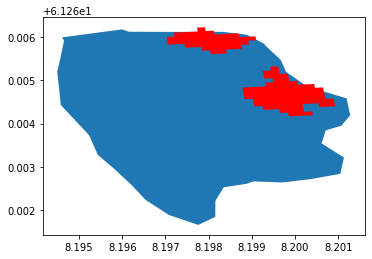

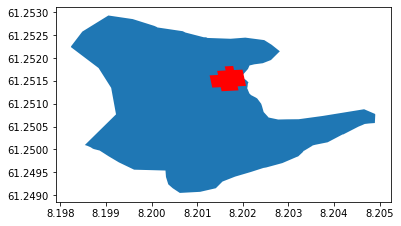

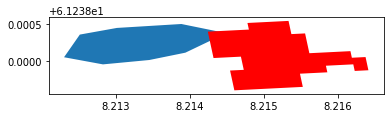

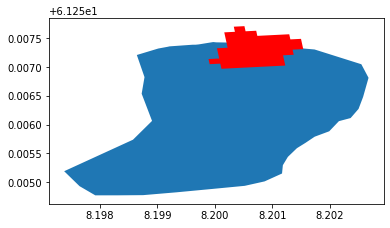

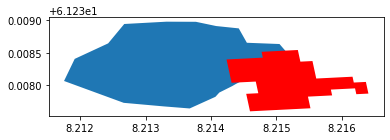

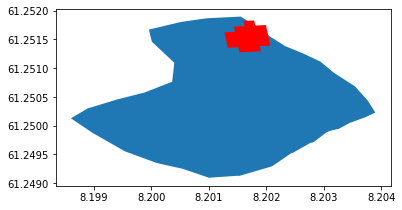

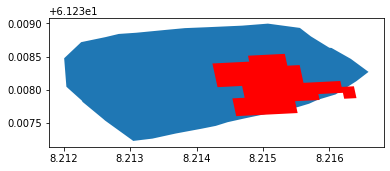

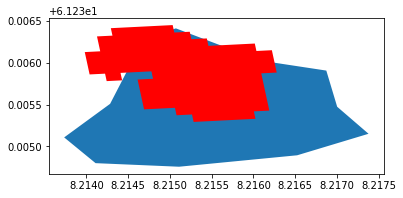

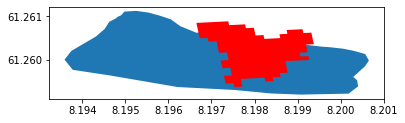

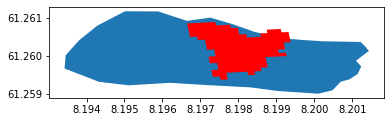

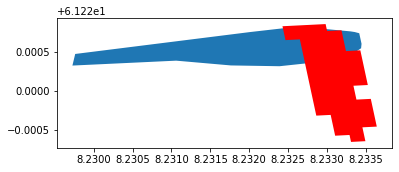

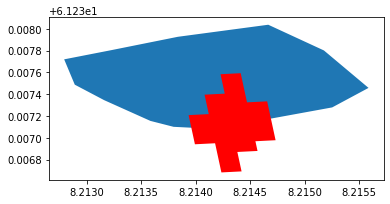

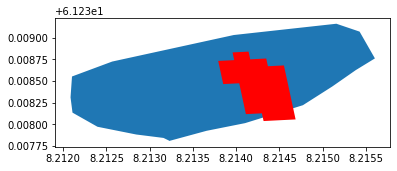

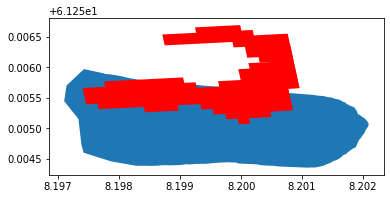

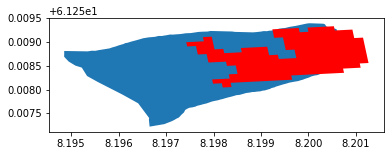

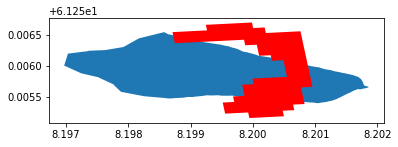

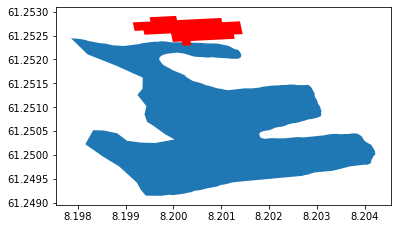

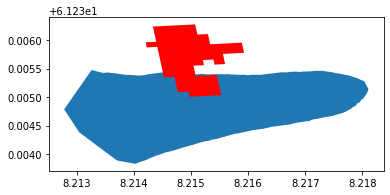

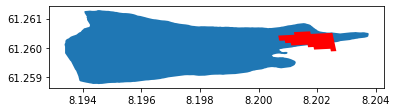

In [7]:
#print(str(match_dict[55]))
for k in match_dict.keys():
    print(k, wys_gdf['d'].iloc[k], match_dict[k])
    ax = wys_gdf.iloc[[k]].plot()
    sat_gdf.iloc[match_dict[k]].plot(ax=ax, color='r')
    plt.gcf().savefig('./figures/test/test_match_wys{0}_sat{1}.png'.format(k, str(match_dict[k])))

In [10]:
# Code from overlap of percentage satgeometry and avalanche area 

aval_name = 'TYIN_skog1_obs_20170112'
wg = wys1617[wys1617['Name']==aval_name].area
print(wg.iloc[0])
ri_a = res_intersection[res_intersection['Name']==aval_name]['gridcode']
print(ri_a)
# ri_a = res_intersection[[res_intersection['Name']==aval_name] & res_intersection['gridcode']==].area
print(ri_a.iloc[0])
print(ri_a.iloc[0]/wg.iloc[0]*100)

NameError: name 'wys1617' is not defined

In [ ]:
aval_names = wys1617['Name'].unique()
print(aval_names, len(aval_names))

In [ ]:
for aval_name in aval_names:
    aval_area = wys1617[wys1617['Name']==aval_name].area
    
    i_area = res_intersection[res_intersection['Name']==aval_name].area
    print(i_area)
    # row['overlap_gc'] = i_area/aval_area
    overlap_gc = i_area/aval_area
    
    print(overlap_gc)
    # 
    # for gc in range(5):
    #     try:
    #         ri_a = res_intersection[res_intersection['Name']==aval_name]['gridcode']


In [ ]:
for aval_name in aval_names:
    aval_area = wys1617[wys1617['Name'] == aval_name].area
    aval_area = aval_area.iloc[0]
    print(aval_name)

    overlap_sum = 0
    # i_area = res_intersection[res_intersection['Name'] == aval_name].area
    for gc in range(5):
        i_area = res_intersection[(res_intersection['Name'] == aval_name) & (res_intersection['gridcode'] == gc)].area
        try:
            _i_area = 0
            for i in range(len(i_area)):
                x = i_area.iloc[i]
                _i_area += x
            # row['overlap_gc'] = i_area/aval_area
            overlap_gc = _i_area / aval_area

            print('\tGC:', gc, '-', i_area, 'ovelap:', overlap_gc*100.)
        except IndexError:
            print('\tno overlapp with gc ', gc)

        overlap_sum += overlap_gc
        print('\tsum: ', overlap_sum)
        a=1
